In [1]:
import os
import numpy as np
import sys
import os
path = os.path.abspath(".")
print(path)
sys.path.append(path + "\code")
from main import *

C:\Users\Utilisateur\Documents\HETIC\Hub_hetic\Open-Food-Fact\notebook


In [2]:
path = ''
all_implement(path)

NearestNeighbors()


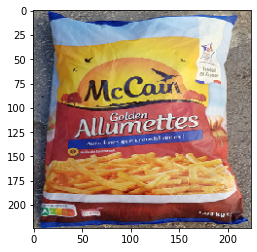

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt
from keras.applications.mobilenet import preprocess_input as prepro_mobile_net
img = image.load_img("../data/CNN/TEST/8710438110043.jpg", color_mode='rgb', target_size=(224, 224))
#img = image.img_to_array(img)
#img = np.expand_dims(img, axis=0)
plt.imshow(img)

In [3]:
set_up_model("CNN", "mobile_net")
create_database_vectorize(name_database="mobile_net.csv", verbose=True)   

number processed: 5000
Execution time: 224.24881887435913
number processed: 10000
Execution time: 477.6903717517853
number processed: 15000
Execution time: 719.3784282207489
number processed: 20000
Execution time: 970.6835310459137
number processed: 25000
Execution time: 1210.862205505371
number processed: 30000
Execution time: 1457.0544338226318
number processed: 35000
Execution time: 1729.6797196865082
number processed: 40000
Execution time: 2017.4380524158478
number processed: 45000
Execution time: 2313.0098898410797
number processed: 50000
Execution time: 2611.5503685474396
number processed: 55000
Execution time: 2909.5298442840576
number processed: 60000
Execution time: 3202.062582015991
number processed: 65000
Execution time: 3502.6560747623444
number processed: 70000
Execution time: 3793.5788934230804
number processed: 75000
Execution time: 4087.1799235343933
number processed: 80000
Execution time: 4370.3101978302
number processed: 85000
Execution time: 4649.149235963821
number 

In [4]:
set_up_model("CNN", "efficient_netB3")
create_database_vectorize(name_database="efficient_netB3.csv", verbose=True,
                              size=(300, 300))

number processed: 5000
Execution time: 1137.7951831817627
number processed: 10000
Execution time: 2287.936329603195
number processed: 15000
Execution time: 3426.116763114929
number processed: 20000
Execution time: 4570.374986171722
number processed: 25000
Execution time: 5721.586116075516
number processed: 30000
Execution time: 6840.625514268875
number processed: 35000
Execution time: 8001.693695783615
number processed: 40000
Execution time: 9140.85114979744
number processed: 45000
Execution time: 10261.418997526169
number processed: 50000
Execution time: 11425.268535137177
number processed: 55000
Execution time: 12574.827048540115
number processed: 60000
Execution time: 13721.140263319016
number processed: 65000
Execution time: 14833.837460756302
number processed: 70000
Execution time: 15974.014073371887
number processed: 75000
Execution time: 17110.374183893204
number processed: 80000
Execution time: 18234.89440226555
number processed: 85000
Execution time: 19394.592178344727
number 

In [1]:
from tensorflow.keras.preprocessing import image
img = image.load_img(path_image, color_mode='rgb', target_size=size)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)

In [4]:
set_up_model("CNN", "mobile_net")
train_knn("mobile_net.csv", verbose = True)


Start
dataset size: (108960, 1001)
Execution time: 90.29581570625305


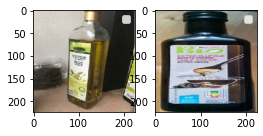

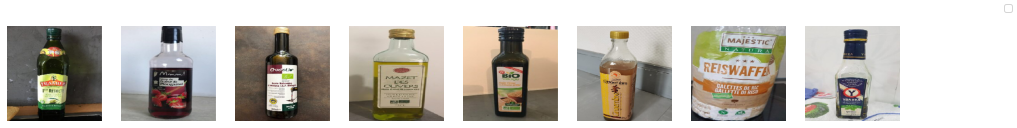

In [10]:
path_dossier_image = "../data/CNN/TEST/27005354.jpg"
show_image(path_dossier_image, 8)

Start create new dataset
number processed: 0
Execution time: 0.0040225982666015625
number processed: 300
Execution time: 73.40845704078674
number processed: 600
Execution time: 147.058513879776
number processed: 900
Execution time: 220.8054871559143
number processed: 1200
Execution time: 294.5700750350952
number processed: 1500
Execution time: 368.51978302001953
number processed: 1800
Execution time: 442.0908420085907
number processed: 2100
Execution time: 515.9725387096405
number processed: 2400
Execution time: 589.7150480747223
number processed: 2700
Execution time: 663.2929451465607
number processed: 3000
Execution time: 736.8729701042175


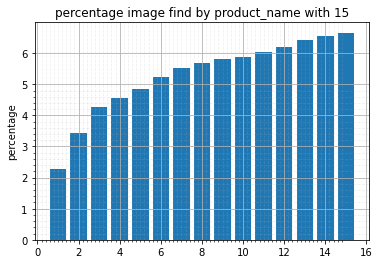

In [5]:
performance_test_cnn(nb_pictures_test=15, verbose=True)

In [6]:
set_up_model("CNN", "efficient_netB3")
train_knn("efficient_netB3.csv")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


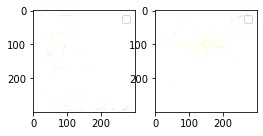

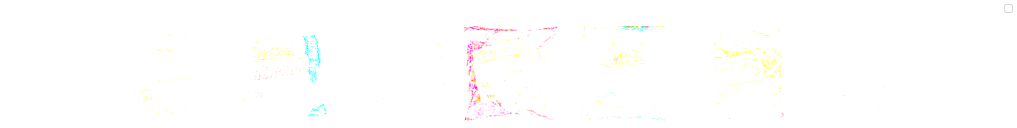

In [7]:
path_dossier_image = "../data/CNN/TEST/8710438110043.jpg"
show_image(path_dossier_image, 8, size=(300,300))

Start create new dataset
number processed: 0
Execution time: 0.004968404769897461
number processed: 300
Execution time: 156.91478729248047
number processed: 600
Execution time: 313.499630689621
number processed: 900
Execution time: 470.33397698402405
number processed: 1200
Execution time: 626.7496151924133
number processed: 1500
Execution time: 783.8025705814362
number processed: 1800
Execution time: 939.78608751297
number processed: 2100
Execution time: 1096.1015946865082
number processed: 2400
Execution time: 1252.9220595359802
number processed: 2700
Execution time: 1410.44118142128
number processed: 3000
Execution time: 1567.7297265529633


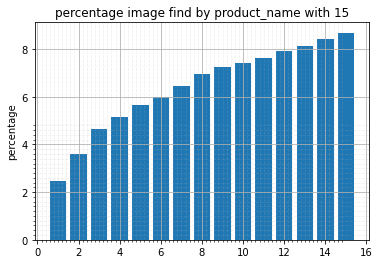

In [8]:
performance_test_cnn(nb_pictures_test=15, verbose=True, size=(300,300))

In [ ]:
set_up_model("CNN", "efficient_net")
create_database_vectorize(name_database="efficient_net.csv", verbose=True)

In [ ]:
set_up_model("CNN", "efficient_net")
train_knn("efficient_net.csv")

In [ ]:
path_dossier_image = "../data/CNN/TEST/8710438110043.jpg"
show_image(path_dossier_image, 8)

In [ ]:
performance_test_cnn(nb_pictures_test=15, verbose=True)

Start create new dataset
number processed: 0
Execution time: 0.0059986114501953125
number processed: 300
Execution time: 95.12419509887695
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[3.3333333333333335, 6.333333333333334, 8.0, 8.666666666666668, 9.166666666666666, 9.833333333333332, 10.0, 10.0, 10.0, 10.0, 10.166666666666666, 11.0, 11.166666666666666, 11.166666666666666, 11.166666666666666]


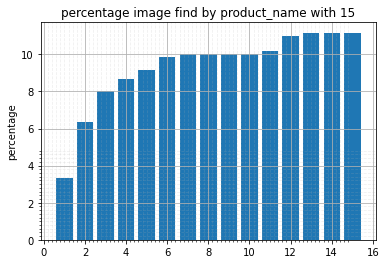

In [17]:
performance_test_cnn(nb_pictures_test=15, verbose=True)

In [7]:
df = pd.read_csv('../data/vector/mobile_net.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1000) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
df.head()

,vector0,vector1,vector2,vector3,vector4,vector5,vector6,vector7,vector8,vector9,...,vector991,vector992,vector993,vector994,vector995,vector996,vector997,vector998,vector999,code
0,-1.199733,3.643265,0.689535,-0.423005,1.635383,-3.310810,-3.878089,-0.969134,0.993793,-4.482959,...,-4.595766,-1.930337,-1.203649,2.370691,3.135196,4.130486,0.889043,3.985877,4.575298,"['0000000005470.jpg', '000000012753.jpg', '000..."
1,-0.211476,1.028852,-1.957532,-1.141809,-1.391902,-0.421291,-3.779544,-3.064687,-1.511359,-0.277129,...,2.535022,0.534469,4.119949,5.534882,3.291615,8.338853,3.476491,0.709517,1.485285,NaN
2,2.023773,2.603284,-2.551643,-1.161763,-1.118147,0.793590,-2.035875,-0.736119,-0.727665,-3.694148,...,-1.526115,-1.376931,0.198593,0.617769,-2.477422,3.862161,2.813299,4.933355,3.832722,NaN
3,0.108607,0.281971,0.169252,-0.517124,-1.475295,2.473556,-2.303340,-4.480214,-4.023914,-2.566303,...,-1.370139,-1.495777,0.611964,0.934092,1.793290,3.422233,1.647041,5.066830,2.017111,NaN
4,-2.729202,-0.373109,-0.892363,1.408508,-3.731155,-2.458267,-2.928890,-1.705372,-0.066577,0.661792,...,-4.238767,-5.419354,-2.829225,-0.699617,-2.954943,-0.421517,-1.099691,1.944289,9.553989,NaN


In [10]:
list_code = df.loc[0,'code']

In [15]:

liste_new_code = list(map(lambda x : x[-4:], list_code))
liste_new_code

['[',
 "'",
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '5',
 '4',
 '7',
 '0',
 '.',
 'j',
 'p',
 'g',
 "'",
 ',',
 ' ',
 "'",
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '2',
 '7',
 '5',
 '3',
 '.',
 'j',
 'p',
 'g',
 "'",
 ',',
 ' ',
 "'",
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '7',
 '4',
 '7',
 '3',
 '9',
 '.',
 'j',
 'p',
 'g',
 "'",
 ',',
 ' ',
 "'",
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '4',
 '9',
 '1',
 '2',
 '2',
 '8',
 '.',
 'j',
 'p',
 'g',
 "'",
 ',',
 ' ',
 "'",
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '5',
 '0',
 '1',
 '6',
 '.',
 'j',
 'p',
 'g',
 "'",
 ',',
 ' ',
 "'",
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '5',
 '0',
 '1',
 '8',
 '.',
 'j',
 'p',
 'g',
 "'",
 ',',
 ' ',
 "'",
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '9',
 '1',
 '2',
 '5',
 '1',
 '2',
 '4',
 '.',
 'j',
 'p',
 'g',
 "'",
 ',',
 ' ',
 "'",
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '2',
 '0',
 '6',
 '5',
 '1',
 '5',
 '.',
 'j',
 'p',
 'g',
 "'",
 ',',
 ' ',
 "'",
 '0',
 '0',
 '0',
 '0'

In [20]:
a = list_code.split(',')

In [21]:
b =  [i.replace('.jpg', "") for i in a]  

In [24]:
b =  [i.replace('\'', "").replace(' ', "") for i in a]  


['[0000000005470.jpg',
 '000000012753.jpg',
 '0000000274739.jpg',
 '0000000491228.jpg',
 '0000005016.jpg',
 '0000005018.jpg',
 '0000009125124.jpg',
 '0000010206515.jpg',
 '00000147.jpg',
 '0000069004681.jpg',
 '0000069013508.jpg',
 '0000069028045.jpg',
 '0000101209159.jpg',
 '00005001.jpg',
 '00005003.jpg',
 '00005006.jpg',
 '00005007.jpg',
 '00005010.jpg',
 '00005011.jpg',
 '00005012.jpg',
 '000051607.jpg',
 '00006910.jpg',
 '000085420.jpg',
 '000087690.jpg',
 '00008815.jpg',
 '000094687.jpg',
 '0001069051606.jpg',
 '0001090092333.jpg',
 '00011136.jpg',
 '0001120000000.jpg',
 '00011679.jpg',
 '00011723.jpg',
 '00012140.jpg',
 '00012188.jpg',
 '00012195.jpg',
 '00012232.jpg',
 '00012317.jpg',
 '00012409.jpg',
 '00013000.jpg',
 '00013932.jpg',
 '00014120.jpg',
 '00015004.jpg',
 '00015011.jpg',
 '00015721.jpg',
 '00015769.jpg',
 '0002000000288.jpg',
 '0002000001865.jpg',
 '0002000003555.jpg',
 '0002000006754.jpg',
 '0002000007324.jpg',
 '0002000008598.jpg',
 '0002000009267.jpg',
 '000200

In [25]:
b = [ i.replace('[', "").replace(']',"") for i in b] 

In [27]:
b =  [i.replace('.jpg', "") for i in b] 
b

['0000000005470',
 '000000012753',
 '0000000274739',
 '0000000491228',
 '0000005016',
 '0000005018',
 '0000009125124',
 '0000010206515',
 '00000147',
 '0000069004681',
 '0000069013508',
 '0000069028045',
 '0000101209159',
 '00005001',
 '00005003',
 '00005006',
 '00005007',
 '00005010',
 '00005011',
 '00005012',
 '000051607',
 '00006910',
 '000085420',
 '000087690',
 '00008815',
 '000094687',
 '0001069051606',
 '0001090092333',
 '00011136',
 '0001120000000',
 '00011679',
 '00011723',
 '00012140',
 '00012188',
 '00012195',
 '00012232',
 '00012317',
 '00012409',
 '00013000',
 '00013932',
 '00014120',
 '00015004',
 '00015011',
 '00015721',
 '00015769',
 '0002000000288',
 '0002000001865',
 '0002000003555',
 '0002000006754',
 '0002000007324',
 '0002000008598',
 '0002000009267',
 '0002000011611',
 '0002000012847',
 '0002000037659',
 '00023092',
 '00024617',
 '00027083',
 '00027137',
 '00028097',
 '00028264',
 '00028271',
 '00029551',
 '00029568',
 '0003004032145',
 '00030069',
 '00030977',
 '

In [28]:
df = pd.read_csv('../data/vector/mobile_net.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1000) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
df['code'] = b 

ValueError: Length of values (4996) does not match length of index (108943)

In [39]:
print(len(list_pictures))

108980


In [ ]:
df = pd.read_csv('../data/vector/mobile_net.csv')

In [35]:
list_pictures = os.listdir(fv.PATH_DATA_IMAGE)

In [36]:
list_pictures = [i.replace('.jpg', "") for i in list_pictures] 

In [37]:
list_pictures

['000000000114',
 '0000000005470',
 '000000012753',
 '0000000274739',
 '0000000491228',
 '0000005016',
 '0000005018',
 '0000009125124',
 '0000010206515',
 '00000147',
 '0000069004681',
 '0000069013508',
 '0000069028045',
 '0000101209159',
 '00005001',
 '00005003',
 '00005006',
 '00005007',
 '00005010',
 '00005011',
 '00005012',
 '000051607',
 '00006910',
 '000085420',
 '000087690',
 '00008815',
 '000094687',
 '0001069051606',
 '0001090092333',
 '00011136',
 '0001120000000',
 '00011679',
 '00011723',
 '00012140',
 '00012188',
 '00012195',
 '00012232',
 '00012317',
 '00012409',
 '00013000',
 '00013932',
 '00014120',
 '00015004',
 '00015011',
 '00015721',
 '00015769',
 '0002000000288',
 '0002000001865',
 '0002000003555',
 '0002000006754',
 '0002000007324',
 '0002000008598',
 '0002000009267',
 '0002000011611',
 '0002000012847',
 '0002000037659',
 '00023092',
 '00024617',
 '00027083',
 '00027137',
 '00028097',
 '00028264',
 '00028271',
 '00029551',
 '00029568',
 '0003004032145',
 '00030069'

In [40]:
list_pictures = list_pictures[:108943]
df['code'] = list_pictures

In [41]:
new_dataset = pd.read_csv("")

0          000000000114
1         0000000005470
2          000000012753
3         0000000274739
4         0000000491228
              ...      
108938         96060599
108939         96060650
108940         96087725
108941         96087770
108942         96096826
Name: code, Length: 108943, dtype: object

In [42]:
df.to_csv('../data/vector/mobile_netV2.csv', index=False)

In [43]:
df2 = pd.read_csv('../data/vector/efficient_netB3.csv')
df2['code'] = list_pictures
df2.to_csv('../data/vector/efficient_netB3.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1536) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
